# Introduction

### Import the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Notebook display settings

In [2]:
# Change the maximum number of rows displayed when viewing 
# the pandas dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import os
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

### Default figure settings

In [3]:
# Set plot properties
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.labelweight']='normal'
mpl.rcParams['figure.figsize']=(8,6)
# Choose the font for the plots based on os (as some fonts are not 
# available across different os)
if os.name=='nt':
    mpl.rcParams['font.family'] = "sans-serif"
    mpl.rcParams['font.sans-serif'] = "Arial"
elif os.name=='posix':  
    mpl.rcParams['font.family'] = "Mukti Narrow"

### Get the number of cpu

In [4]:
import multiprocessing as mp
# Get the number of cpu available for parallel processing
n_cpu=mp.cpu_count()

# Data Transformation & Exploration

## Read the data

In [5]:
# Read the csv file 
data=pd.read_csv('Data/epl-training.csv')
# Dropping the trailing columns
data.dropna(axis=1, how='all',inplace=True)
data.drop([column for column in data.columns if 'Unnamed' in column], axis = 1, inplace=True) 
data.shape

(4180, 22)

In [6]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


## Exploratory Data Analysis

In [7]:
def get_pivot_column_vs_column_count(df,col1,col2):
    '''
    This function returns a dataframe after pivoting a column 
    against another column.
    
    Parameters:
        df (DataFrame): 
        col1 (str):
        col2 (str):
    
    Returns:
        (DataFrame): 
    '''
    return df.groupby([col1,col2]).size().reset_index().\
              rename(columns={0:'counts'}).\
              pivot(values='counts',index=col1,columns=col2)

In [8]:
def get_column_countplot(df,col,y='FTR',ax=None ):
    '''
    This function 
    
    Parameters:
        df (DataFrame):
        col (str):
        y (str ; default:'FTR'):
        ax (obj ; default: None): Axes of the plot
    
    Returns:
        None
    '''
    if ax is None:
        ax = plt.gca()
    df.groupby([col, y]).size().reset_index().\
       pivot(columns=y, index=col, values=0).\
       plot(kind='bar', stacked=True,ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    ax.set_title('Count Plot: %s'%(col))

#### Number of matches

In [9]:
get_pivot_column_vs_column_count(data,'HomeTeam','AwayTeam')

AwayTeam,Arsenal,Aston Villa,Birmingham,Blackburn,Blackpool,Bolton,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Hull,Leicester,Liverpool,Man City,Man United,Middlesbrough,Newcastle,Norwich,Portsmouth,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,Watford,West Brom,West Ham,Wigan,Wolves
HomeTeam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arsenal,NaN,8.0,2.0,4.0,1.0,4.0,4.0,2.0,5.0,2.0,11.0,6.0,11.0,7.0,2.0,5.0,5.0,11.0,11.0,11.0,2.0,9.0,4.0,2.0,3.0,1.0,7.0,10.0,9.0,7.0,11.0,4.0,9.0,10.0,5.0,4.0
Aston Villa,8.0,NaN,2.0,4.0,1.0,4.0,1.0,NaN,2.0,1.0,8.0,3.0,8.0,6.0,NaN,4.0,2.0,8.0,8.0,8.0,1.0,7.0,4.0,2.0,3.0,1.0,4.0,8.0,8.0,5.0,8.0,1.0,7.0,7.0,5.0,3.0
Birmingham,2.0,2.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0
Blackburn,4.0,4.0,2.0,NaN,1.0,4.0,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Blackpool,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
Bolton,4.0,4.0,2.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Bournemouth,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,4.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,NaN,1.0
Brighton,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,1.0
Burnley,5.0,2.0,1.0,1.0,NaN,1.0,3.0,2.0,NaN,1.0,5.0,4.0,5.0,2.0,2.0,3.0,4.0,5.0,5.0,5.0,1.0,3.0,NaN,1.0,1.0,NaN,4.0,4.0,3.0,3.0,5.0,3.0,3.0,5.0,1.0,2.0


### HTR vs. FTR

In [10]:
get_pivot_column_vs_column_count(data,'HTR','FTR')

FTR,A,D,H
HTR,,,
A,703,199,99
D,439,647,646
H,70,191,1186


In [11]:
# Save the column names of categorical features as a list
cat_col_list=[x for x in data.columns\
              if x not in ['Date','HomeTeam','AwayTeam','Referee','FTR','HTR']]

In [12]:
cat_col_list = np.reshape(cat_col_list, (8, 2))

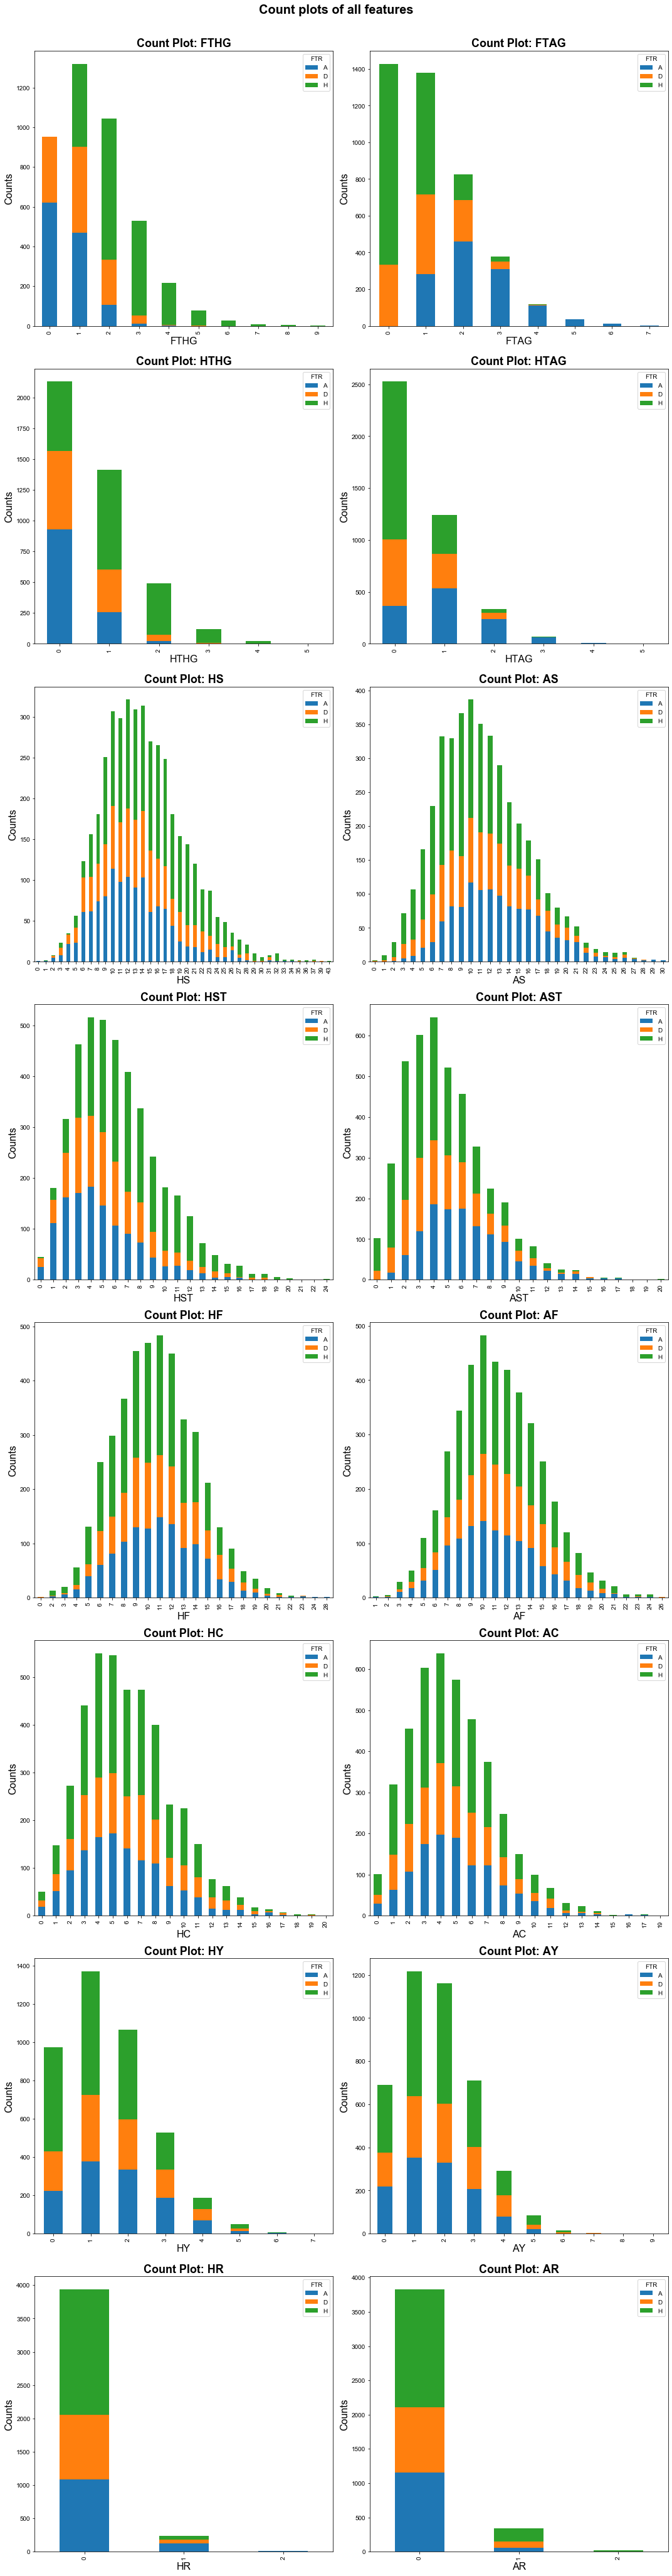

In [13]:
# Call the function get_column_countplot() to plot the count plot of
# the categorical columns as s ubplots in a figure
fig, axes = plt.subplots(8,2,figsize=(15,60))
for i in range(8):
    for j in range(2):
        get_column_countplot(data,cat_col_list[i][j], ax=axes[i,j])
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Count plots of all features",fontweight='bold',fontsize=20)
plt.show()

### Number of referees

There are 36 referees (possibly one from each team).

In [14]:
data['Referee'].nunique()

36

### Checking the dataset is balanced

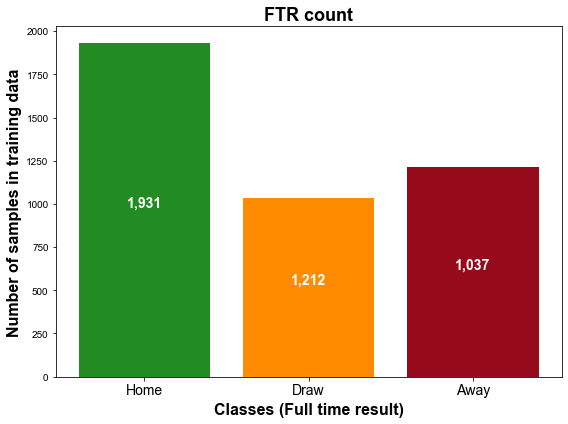

In [15]:
# Get the counts 
count_val=data['FTR'].value_counts()

# Visualise the count
X_ticks=['Home','Draw','Away']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='forestgreen')
plt.bar(2,count_val[2],color='darkorange')
plt.bar(3,count_val[1],color='#970a1b')
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(2, count_val[2]/2, "{:,}".format(count_val[1]), color='w'
         ,ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(3, count_val[1]/2, "{:,}".format(count_val[2]), color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
ax.set_title('FTR count',fontsize=18,fontweight='bold')
ax.set_xlabel('Classes (Full time result)',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of samples in training data',fontsize=16,
              fontweight='bold')
ax.set_xticks([1,2,3])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

### Some stats 

In [16]:
# Get total number of matches
total_matches = data.shape[0] 
# Sum home goals column, divide by total matches
average_home_goals = data.FTHG.sum()/ total_matches
print('Average Home goals: ', average_home_goals)
# Sum away goals column, divide by total matches
average_away_goals = data.FTAG.sum() / total_matches
print('Average Away goals: ',average_away_goals) 
# Average conceded goals = Average of goals for opposite team
avg_home_conceded = average_away_goals 
avg_away_conceded = avg_home_conceded


Average Home goals:  1.555023923444976
Average Away goals:  1.1708133971291865


In [17]:
# Some additional features: 
# - Average goals of home team in the past n matches against the away team
# - Average goals of away team in past n matches against home team
# - Average points of away team in the past n matches against the home team

n_matches = data.shape[0]
average_home_points = (3*count_val['H'] + count_val['D'])/n_matches
average_away_points = (3*count_val['A'] + count_val['D'])/n_matches
print('Average Home Goals:', average_home_goals)
print('Average Away Goals:', average_away_goals)
print('Average Home Points:',average_home_points)
print('Average Away Points:', average_away_points)

Average Home Goals: 1.555023923444976
Average Away Goals: 1.1708133971291865
Average Home Points: 1.6339712918660287
Average Away Points: 1.1179425837320573


___Note:___ This is the average across ALL teams

## Splitting into X and y

In [39]:
X=data.copy()
y=data['FTR']

## Feature Extraction

### Creating the team statistics dataframe

In [19]:
team_stats= pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

In [20]:
# Group by data by the teams
res_home = data.groupby('HomeTeam')
res_away = data.groupby('AwayTeam')

In [21]:
# Add the list of team names
team_stats.Team=pd.Series(data['HomeTeam'].unique())

In [22]:
# Home goal score (HGS)
team_stats.HGS = res_home.FTHG.sum().values 
# Home goal conceded (HGC)
team_stats.HGC = res_home.FTAG.sum().values

In [23]:
# Away goal score (AGS)
team_stats.AGS = res_away.FTAG.sum().values 
# Away goal conceded (AGC)
team_stats.AGC = res_away.FTHG.sum().values 

In [24]:
# Calculate number of games played
total_home_games_played = res_home.FTHG.count()
total_away_games_played = res_away.FTAG.count()

In [25]:
# Home Attacking Strength
team_stats.HAS = (np.divide(team_stats.HGS,total_home_games_played.values)) / average_home_goals
# Away Attacking Strength
team_stats.AAS = (np.divide(team_stats.AGS,total_away_games_played.values)) / average_away_goals

In [26]:
# Home Defence Strength
team_stats.HDS = (np.divide(team_stats.HGC,total_home_games_played.values)) / avg_home_conceded
# Away Defence Strength
team_stats.ADS = (np.divide(team_stats.AGC,total_away_games_played.values)) / avg_away_conceded

In [27]:
# Obtaining for each team: Average number of goals scored and conceded when at home and at away.
team_stats.GSA = (np.divide(team_stats.AGS,total_away_games_played.values))
team_stats.GSH = (np.divide(team_stats.HGS,total_home_games_played.values))

team_stats.GCA = (np.divide(team_stats.AGC,total_away_games_played.values))
team_stats.GCH = (np.divide(team_stats.HGC,total_home_games_played.values))

In [28]:
team_stats.head()

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,441,356,1.356923,1.454843,174,292,0.711075,1.193298
1,Bolton,179,156,0.757308,0.876584,198,264,1.112587,1.483449
2,Everton,38,37,0.643077,0.831631,35,70,0.786678,1.573355
3,Hull,98,77,0.829231,0.865345,90,162,1.011443,1.820597
4,Middlesbrough,30,25,1.015385,1.123825,37,41,1.663261,1.843073


In [29]:
# Adding month and year columns
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')
data['Month'] = data['Date'].dt.month 
data['Year'] = data['Date'].dt.year 

In [30]:
def get_features_match(match, n=5):
    team1 = match['HomeTeam']
    team2 = match['AwayTeam']
    # Constructing a table when all the matches between the two teams are shown.
    res = X[((X['HomeTeam']==team1) & (X['AwayTeam']==team2)) | ((X['AwayTeam']==team1) & (X['HomeTeam']==team2))]
    name = match.name
    idx = res.index.get_loc(name)
    if idx >= n: #If there is at least n matches between the teams
        matches = res.iloc[idx-n:idx]
        pts_home = 0
        goals_home = 0
        goals_away = 0
        for index, row in matches.iterrows():
            #This ifs control if the current home team was home team or away in the past matches between the team in order
            #to sum correctly home/away goals. 
            if row['HomeTeam'] == team1:
                goals_home += row['FTHG']
                goals_away += row['FTAG']
                if Y[index] == 'H':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
            if row['AwayTeam'] == team1:
                goals_home += row['FTAG'] 
                goals_away += row['FTHG']
                if Y[index] == 'A':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
        pts_avg = pts_home/n
        goals_home_avg = goals_home/n
        goals_away_avg = goals_away/n
    elif idx == 0: # If there is 0 matches between the teams
        pts_avg = average_home_points
        goals_home_avg = average_home_goals
        goals_away_avg = average_away_goals
    else: #Some games between the teams but not n
        matches = res.iloc[0:idx]
        m = len(matches)
        pts_home = 0
        goals_home = 0
        goals_away = 0
        for index, row in matches.iterrows():
            #This ifs control if the current home team was home team or away in the past matches between the team in order
            #to sum correctly home/away goals. 
            if row['HomeTeam'] == team1:
                goals_home += row['FTHG']
                goals_away += row['FTAG']
                if Y[index] == 'H':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
            if row['AwayTeam'] == team1:
                goals_home += row['FTAG'] 
                goals_away += row['FTHG']
                if Y[index] == 'A':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
        pts_avg = pts_home/m
        goals_home_avg = goals_home/m
        goals_away_avg = goals_away/m
    return [pts_avg, goals_home_avg, goals_away_avg]

In [ ]:
# pts_avgs = []
# goals_home_avgs = []
# goals_away_avgs = []
# for index, row in X.iterrows():
#     pts_avg, goals_home_avg, goals_away_avg = get_features_match(row, n=5)
#     pts_avgs.append(pts_avg)
#     goals_home_avgs.append(goals_home_avg)
#     goals_away_avgs.append(goals_away_avg)
# len(pts_avgs)

In [ ]:
# # Average points of home team in the past n matches against the away team.
# X['FFPTSH'] = pts_avgs
# # Average goals of away team against home team in past n matches
# X['FFHG'] = goals_home_avgs
# # Average goals of home team against away team in the past n matches
# X['FFAG'] = goals_away_avgs 

Extract features relating to form. Form is defined as a team's recent performance, e.g. recently winning many matches.


We can also look at whether a team is also "streaking" i.e. winning matches consecutively.

In [ ]:
def get_features_streak_home(match, n=10):
    team1 = match['HomeTeam']
    team1_stats = X[((X['HomeTeam']==team1) | (X['AwayTeam']==team1))]
    name = match.name
    idx = team1_stats.index.get_loc(name)
    if idx == 0:
        pts_avg = average_home_points
        goals_scored_avg = average_home_goals
        goals_conceded_avg = average_away_goals
    else:
        if idx-n < 0:
            newidx = 0
        else:
            newidx = idx - n
        matches_team1 = team1_stats.iloc[newidx:idx]
        m = len(matches_team1)
        pts = 0
        goals_scored = 0
        goals_conceded = 0
        for index, row in matches_team1.iterrows():
            if row['HomeTeam'] == team1:
                goals_scored += row['FTHG']
                goals_conceded += row['FTAG']
                if Y[index] == 'H':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
            if row['AwayTeam'] == team1:
                goals_scored += row['FTAG'] 
                goals_conceded += row['FTHG']
                if Y[index] == 'A':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
        pts_avg = pts/m
        goals_scored_avg = goals_scored/m
        goals_conceded_avg = goals_conceded/m
    return [pts_avg, goals_scored_avg, goals_conceded_avg]

In [ ]:
# #Seeing if it works for a given match
# match = X.iloc[1234,:]
# get_features_streak_home(match, n=10)


# pts_streak_home = []
# goals_scored_streak_home = []
# goals_conceded_streak_home = []
# for index, row in X.iterrows():
#     pt_streak_home, goal_scored_streak_home, goal_conceded_streak_home = get_features_streak_home(row, n=15)
#     pts_streak_home.append(pt_streak_home)
#     goals_scored_streak_home.append(goal_scored_streak_home)
#     goals_conceded_streak_home.append(goal_conceded_streak_home)
# print(len(pts_streak_home))

# X['PSH'] = pts_streak_home
# X['SSH'] = goals_home_avgs
# X['CSH'] = goals_away_avgs 

In [ ]:
def get_features_streak_away(match, n=10):
    team1 = match['AwayTeam']
    team1_stats = X[((X['HomeTeam']==team1) | (X['AwayTeam']==team1))]
    name = match.name
    idx = team1_stats.index.get_loc(name)
    if idx == 0:
        pts_avg = average_away_points
        goals_scored_avg = average_away_goals
        goals_conceded_avg = average_home_goals
    else:
        if idx-n < 0:
            newidx = 0
        else:
            newidx = idx - n
        matches_team1 = team1_stats.iloc[newidx:idx]
        m = len(matches_team1)
        pts = 0
        goals_scored = 0
        goals_conceded = 0
        for index, row in matches_team1.iterrows():
            if row['HomeTeam'] == team1:
                goals_scored += row['FTHG']
                goals_conceded += row['FTAG']
                if Y[index] == 'H':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
            if row['AwayTeam'] == team1:
                goals_scored += row['FTAG'] 
                goals_conceded += row['FTHG']
                if Y[index] == 'A':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
        pts_avg = pts/m
        goals_scored_avg = goals_scored/m
        goals_conceded_avg = goals_conceded/m
    return [pts_avg, goals_scored_avg, goals_conceded_avg]

In [ ]:
# pts_streak_away = []
# goals_scored_streak_away = []
# goals_conceded_streak_away = []
# for index, row in X.iterrows():
#     pt_streak_away, goal_scored_streak_away, goal_conceded_streak_away = get_features_streak_away(row, n=15)
#     pts_streak_away.append(pt_streak_away)
#     goals_scored_streak_away.append(goal_scored_streak_away)
#     goals_conceded_streak_away.append(goal_conceded_streak_away)
# len(pts_streak_home)

# X['PSA'] = pts_streak_away
# X['SSA'] = goals_scored_streak_away
# X['CSA'] = goals_conceded_streak_away

In [33]:
X.head()

,HomeTeam,AwayTeam
0,Arsenal,West Brom
1,Bolton,Stoke
2,Everton,Blackburn
3,Hull,Fulham
4,Middlesbrough,Tottenham


In [38]:
X[['FFPTSH','FFHG','FFAG']]=X.apply(get_features_match,args=[5],axis=1)

NameError: ("name 'Y' is not defined", 'occurred at index 178')

### Build X

In [45]:
def match_with_team_stats(X,team_stats,col_to_add,left_on,right_on='Team'):
    X=pd.merge(X,team_stats[[right_on,col_to_add]],how='left',left_on=left_on,right_on=right_on,sort=False).\
                                                                                    drop(right_on, axis = 1) 
    return X

In [ ]:
def build_X(X,team_stats):
    # Add Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), 
    # Away Defensive Strength(ADS)
    X=match_with_team_stats(X,team_stats,'HAS','HomeTeam')
    X=match_with_team_stats(X,team_stats,'HDS','HomeTeam')
    X=match_with_team_stats(X,team_stats,'AAS','AwayTeam')
    X=match_with_team_stats(X,team_stats,'ADS','AwayTeam')
    # Add Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC) ??
    X[['FFPTSH','FFHG','FFAG']]=X.apply(get_features_match,args=(5))
    X[['PSH','SSH','CSH']]=X.apply(get_features_streak_home,args=(15))
    X[['PSA','SSA','CSA']]=X.apply(get_features_streak_away,args=(15))
    return X

In [ ]:
X.head()

### Calculate the correlation between the features

In [16]:
correlation = data.corr()
corr_array  = np.array(correlation)

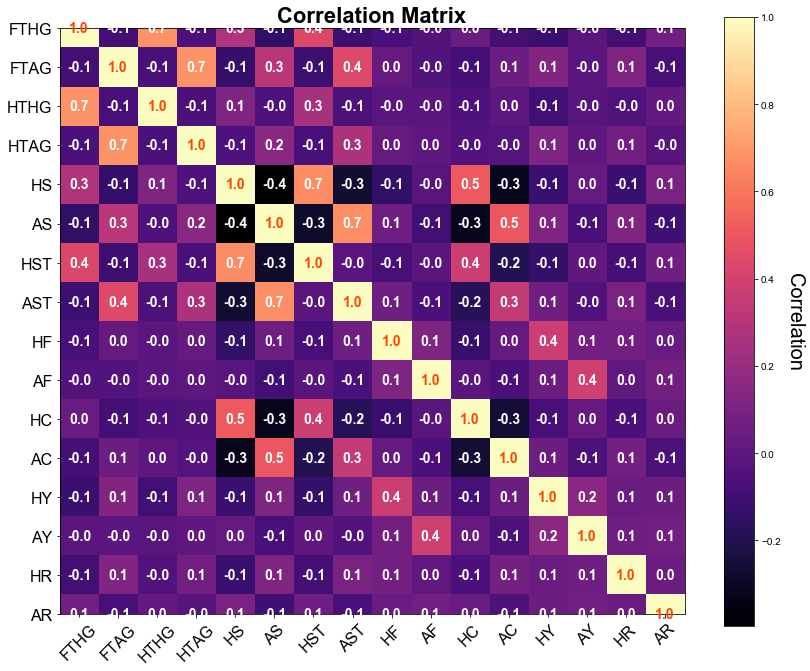

In [29]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
heatmap_data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%heatmap_data[i, j], 
                                color=textcolors[heatmap_data[i, j]>0.85],
                                ha='center',va='center',fontsize=14,fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=22,fontweight='bold')
ax.set_xticks(np.arange(len(correlation.columns.tolist())))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns,fontsize=16,rotation=45)
ax.set_yticklabels(correlation.columns,fontsize=16)
plt.show()

## Preprocessing data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encode the values

In [21]:
le = LabelEncoder()
for column in ['HomeTeam','AwayTeam','HTR','Referee']:
    X_train[column]=LabelEncoder().fit_transform(X_train[column])
y_train=le.fit_transform(y_train)

### Scale the values

In [22]:
 X_train=MinMaxScaler().fit_transform(X_train)

# Model Training & Validation

## Train the model with all features

`cross_validate` was chosen over `cross_val_score` because the former allows more than one metric scores to be passed together.

In [23]:
def get_scores(model,X,y):
    '''
    Parameters:
        model
        X
        y
    
    Returns:
    '''
    scores = cross_validate(model_LR, X, y, scoring=('accuracy','f1_macro','precision_macro','recall_macro','roc_auc_ovr'),
                            cv=10, return_train_score=True,n_jobs=n_cpu)
    print('Accuracy: %f'%(scores['test_accuracy'].mean()))
    print('Precision: %f'%(scores['test_precision_macro'].mean()))
    print('Recall: %f'%(scores['test_recall_macro'].mean()))
    print('f1 Score: %f'%(scores['test_f1_macro'].mean()))
    print('ROC-AUC: %f'%(scores['test_roc_auc_ovr'].mean()))
    return scores

In [24]:
def get_best_params_RandomizedCV(model,X,y,param_grid,refit='accuracy'):
    '''
    This function executes the RandomizedSearchCV() to tune the 
    hyperparameters, prints the best scores and returns the list of 
    best performing hyperparameters.
    
    Parameters:
        model
        X
        y
        param_grid
        refit='accuracy'
    
    Returns:
        grid_results.best_params_ (dictionary):
    '''
    scoring=('accuracy','f1_macro','roc_auc_ovr')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = RandomizedSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    grid_results.fit(X, y)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best mean %s Score: '%(other_scores[0]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best mean %s Score: '%(other_scores[1]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    return grid_results.best_params_

In [25]:
def get_best_params_GridCV(model,X,y,param_grid,refit='accuracy'):
    '''
    This function executes the GridSearchCV() to tune the 
    hyperparameters, prints the best scores and returns the list of 
    best performing hyperparameters.
    
    Parameters:
    model
    X
    y
    param_grid
    refit='accuracy'
    
    Returns:
    grid_results.best_params_ (dictionary):
    '''
    scoring=('accuracy','f1_macro','roc_auc_ovr')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = GridSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    grid_results.fit(X, y)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best mean %s Score: '%(other_scores[0]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best mean %s Score: '%(other_scores[1]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    return grid_results.best_params_

### Logistic Regression Classifier 

In [26]:
model_LR = LogisticRegression(n_jobs=n_cpu)
scores_LR=get_scores(model_LR,X_train,y_train)

Accuracy: 0.979970
Precision: 0.978330
Recall: 0.974082
f1 Score: 0.975958
ROC-AUC: 0.997835


In [27]:
param_grid={'solver':['newton-cg', 'sag','saga', 'lbfgs']}
best_params_LR=get_best_params_GridCV(model_LR,X_train,y_train,param_grid,refit='accuracy')

Best parameters: 
 {'solver': 'sag'}
Best mean accuracy Score:  0.980268120475467
Best mean f1_macro Score:  0.9763260578607564
Best mean roc_auc_ovr Score:  0.9763260578607564


### k-NN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=n_cpu)
scores_knn=get_scores(model_knn,X_train,y_train)

### Support Vector Machine Classifier

In [ ]:
model_svm = SVC()
scores_svm =get_scores(model_svm,X_train,y_train)

### Gaussian Naive Bayes Classifier

In [ ]:
model_gnb=GaussianNB()
scores_gnb=get_scores(model_gnb,X_train,y_train)

### SGD Classifier

In [ ]:
model_sgd = SGDClassifier(max_iter=1000000, tol=1e-3)

scores_sgd=get_scores(model_sgd,X_train,y_train)

### Multi Layer Perceptron Classifier (Neural Networks)

In [ ]:
model_mlp = MLPClassifier(solver='sgd',activation='identity',learning_rate='adaptive',
                          hidden_layer_sizes=(8, 2), random_state=76)
scores_mlp=get_scores(model_nlp,X_train,y_train)

### Random Forest Classifier

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=100,n_jobs=n_cpu)

scores_rfc = get_scores(model_rfc,X_train,y_train)

## Compare the models

## Train model with selected features

# Results

# Final Predictions on Test Set

# Conclusion